In [1]:
pip install pulp

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------- ----------------------------- 4.2/16.4 MB 27.9 MB/s eta 0:00:01
   -------------------------- ------------- 11.0/16.4 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.4 MB 28.5 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 25.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\smart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


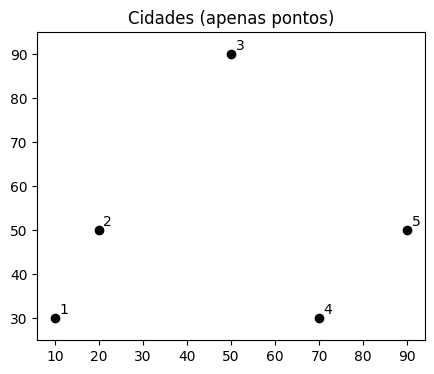

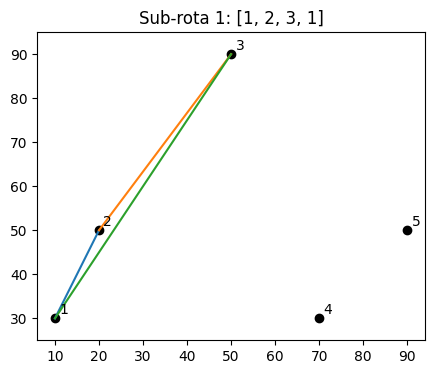

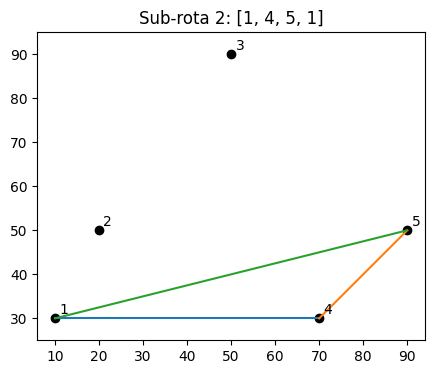

In [27]:
import numpy as np
import ClassCaixeiro as cc

coords = np.array([
    [10, 30],  # 1
    [20, 50],  # 2
    [50, 90],  # 3
    [70, 30],  # 4
    [90, 50],  # 5
])

cc.plot_points(coords, "Cidades (apenas pontos)")


subroutes = [[0, 1, 2, 0], [0, 3, 4, 0]]
for idx, sr in enumerate(subroutes, 1):
    cc.plot_route(coords, sr, f"Sub‑rota {idx}: {[i+1 for i in sr]}")

$$
d(i,j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}
$$

Abaixo, estão as coordenadas de cada cidade:

| Cidade | $x$ | $y$ |
| ------ | --- | --- |
| 1      | 10  | 30  |
| 2      | 20  | 50  |
| 3      | 50  | 90  |
| 4      | 70  | 30  |
| 5      | 90  | 50  |

---

### 🔢 Cálculos manuais das distâncias principais

#### Entre cidade 1 e 2:

$$
\sqrt{(10 - 20)^2 + (30 - 50)^2} = \sqrt{(-10)^2 + (-20)^2} = \sqrt{100 + 400} = \sqrt{500} \approx \boxed{22.36}
$$

#### Entre cidade 1 e 3:

$$
\sqrt{(10 - 50)^2 + (30 - 90)^2} = \sqrt{(-40)^2 + (-60)^2} = \sqrt{1600 + 3600} = \sqrt{5200} \approx \boxed{72.11}
$$

#### Entre cidade 1 e 4:

$$
\sqrt{(10 - 70)^2 + (30 - 30)^2} = \sqrt{(-60)^2 + 0^2} = \sqrt{3600} = \boxed{60.00}
$$

#### Entre cidade 1 e 5:

$$
\sqrt{(10 - 90)^2 + (30 - 50)^2} = \sqrt{(-80)^2 + (-20)^2} = \sqrt{6400 + 400} = \sqrt{6800} \approx \boxed{82.46}
$$

In [29]:

print("\nTabela de distâncias euclidianas (unidades):")
cc.distance_table(coords)


Tabela de distâncias euclidianas (unidades):


,1,2,3,4,5
1,0.00,22.36,72.11,60.00,82.46
2,22.36,0.00,50.00,53.85,70.00
3,72.11,50.00,0.00,63.25,56.57
4,60.00,53.85,63.25,0.00,28.28
5,82.46,70.00,56.57,28.28,0.00


### Formulação completa do TSP para 5 cidades

*(usando as mesmas notações do livro)*

---

#### Variável de decisão

$$
x_{ij}= 
\begin{cases}
1 & \text{se o caixeiro‑viajante vai diretamente da cidade } i \text{ para a cidade } j,\; i\ne j\\
0 & \text{caso contrário}
\end{cases}
\qquad i,j\in N=\{1,2,3,4,5\}
$$

---

#### Função‑objetivo

Minimizar a distância total percorrida:

$$
\boxed{\;F_{\text{obj}}=\min z=\sum_{i=1}^{5}\sum_{\substack{j=1\\[2pt] j\ne i}}^{5}c_{ij}\,x_{ij}\;}
$$

onde $c_{ij}$ é a distância euclidiana entre as cidades $i$ e $j$ (ver tabela gerada no código).

---

### Restrições

1. **Cada nó deve ter exatamente uma aresta saindo**

   $$
   \begin{aligned}
   x_{12}+x_{13}+x_{14}+x_{15} &=1& (i=1)\\
   x_{21}+x_{23}+x_{24}+x_{25} &=1& (i=2)\\
   x_{31}+x_{32}+x_{34}+x_{35} &=1& (i=3)\\
   x_{41}+x_{42}+x_{43}+x_{45} &=1& (i=4)\\
   x_{51}+x_{52}+x_{53}+x_{54} &=1& (i=5)
   \end{aligned}
   $$

2. **Cada nó deve ter exatamente uma aresta entrando**

   $$
   \begin{aligned}
   x_{21}+x_{31}+x_{41}+x_{51} &=1& (j=1)\\
   x_{12}+x_{32}+x_{42}+x_{52} &=1& (j=2)\\
   x_{13}+x_{23}+x_{43}+x_{53} &=1& (j=3)\\
   x_{14}+x_{24}+x_{34}+x_{54} &=1& (j=4)\\
   x_{15}+x_{25}+x_{35}+x_{45} &=1& (j=5)
   \end{aligned}
   $$

3. **Eliminação de subtours com 2 nós ($|S|=2$)**

   $$
   \begin{aligned}
   x_{12}+x_{21}&\le 1\\
   x_{13}+x_{31}&\le 1\\
   x_{14}+x_{41}&\le 1\\
   x_{15}+x_{51}&\le 1\\
   x_{23}+x_{32}&\le 1\\
   x_{24}+x_{42}&\le 1\\
   x_{25}+x_{52}&\le 1\\
   x_{34}+x_{43}&\le 1\\
   x_{35}+x_{53}&\le 1\\
   x_{45}+x_{54}&\le 1
   \end{aligned}
   $$

4. **Eliminação de subtours com 3 nós ($|S|=3$)**
   (listar todas as combinações de três índices; cada desigualdade soma as 6 arestas internas e limita a ≤ 2)

   $$
   \begin{aligned}
   x_{12}+x_{23}+x_{31}&\le 2\\
   x_{12}+x_{24}+x_{41}&\le 2\\
   x_{12}+x_{25}+x_{51}&\le 2\\
   \\[-1pt]
   x_{13}+x_{34}+x_{41}&\le 2\\
   x_{13}+x_{35}+x_{51}&\le 2\\
   \\[-1pt]
   x_{14}+x_{45}+x_{51}&\le 2\\
   \\[-1pt]
   x_{23}+x_{35}+x_{52}&\le 2\\
   x_{24}+x_{45}+x_{52}&\le 2\\
   x_{25}+x_{53}+x_{32}&\le 2\\
   \\[-1pt]
   x_{34}+x_{45}+x_{53}&\le 2
   \end{aligned}
   $$

5. **Eliminação de subtours com 4 nós ($|S|=4$)**
   (cada desigualdade soma as 12 arestas internas e limita a ≤ 3)

   $$
   \begin{aligned}
   x_{12}+x_{23}+x_{34}+x_{41}&\le 3\\
   x_{12}+x_{23}+x_{35}+x_{51}&\le 3\\
   x_{12}+x_{24}+x_{45}+x_{51}&\le 3\\
   x_{13}+x_{34}+x_{45}+x_{51}&\le 3\\
   x_{23}+x_{35}+x_{45}+x_{52}&\le 3
   \end{aligned}
   $$

6. **Domínio das variáveis**

   $$
   x_{ij}\in\{0,1\},\qquad i,j=1,\dots,5,\; i\ne j
   $$


In [30]:
dist = cc.euclidean_matrix(coords)
tour, cost = cc.solve_tsp_mtz(dist)
route_str = " → ".join(str(i+1) for i in tour)
print("Rota ótima:", route_str)
print(f"Distância total: {cost:.2f}\n")

# 4.1 Mostrar coordenadas
print("Coordenadas das cidades (x, y):")
for i, (x, y) in enumerate(coords, 1):
    print(f"  Cidade {i}: ({x}, {y})")

Rota ótima: 1 → 4 → 5 → 3 → 2 → 1
Distância total: 217.21

Coordenadas das cidades (x, y):
  Cidade 1: (10, 30)
  Cidade 2: (20, 50)
  Cidade 3: (50, 90)
  Cidade 4: (70, 30)
  Cidade 5: (90, 50)


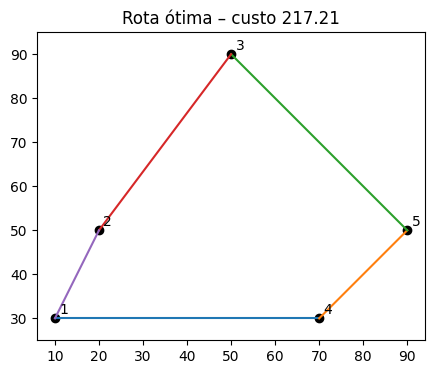

In [31]:
cc.plot_route(coords, tour, f"Rota ótima – custo {cost:.2f}")

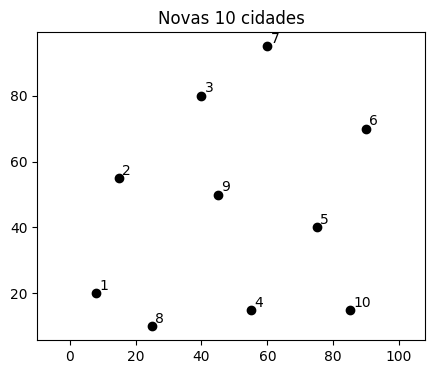


┌── Coordenadas (x, y) ───────────
│ Cidade 1: (8, 20)
│ Cidade 2: (15, 55)
│ Cidade 3: (40, 80)
│ Cidade 4: (55, 15)
│ Cidade 5: (75, 40)
│ Cidade 6: (90, 70)
│ Cidade 7: (60, 95)
│ Cidade 8: (25, 10)
│ Cidade 9: (45, 50)
│ Cidade 10: (85, 15)
└────────────────────────────────

Tabela de distâncias euclidianas (unidades):


,1,2,3,4,5,6,7,8,9,10
1,0.00,35.69,68.00,47.27,69.92,96.04,91.26,19.72,47.63,77.16
2,35.69,0.00,35.36,56.57,61.85,76.49,60.21,46.10,30.41,80.62
3,68.00,35.36,0.00,66.71,53.15,50.99,25.00,71.59,30.41,79.06
4,47.27,56.57,66.71,0.00,32.02,65.19,80.16,30.41,36.40,30.00
5,69.92,61.85,53.15,32.02,0.00,33.54,57.01,58.31,31.62,26.93
6,96.04,76.49,50.99,65.19,33.54,0.00,39.05,88.46,49.24,55.23
7,91.26,60.21,25.00,80.16,57.01,39.05,0.00,91.92,47.43,83.82
8,19.72,46.10,71.59,30.41,58.31,88.46,91.92,0.00,44.72,60.21
9,47.63,30.41,30.41,36.40,31.62,49.24,47.43,44.72,0.00,53.15
10,77.16,80.62,79.06,30.00,26.93,55.23,83.82,60.21,53.15,0.00



Rota ótima: 1 → 8 → 4 → 10 → 5 → 6 → 7 → 3 → 9 → 2 → 1
Distância total: 301.18


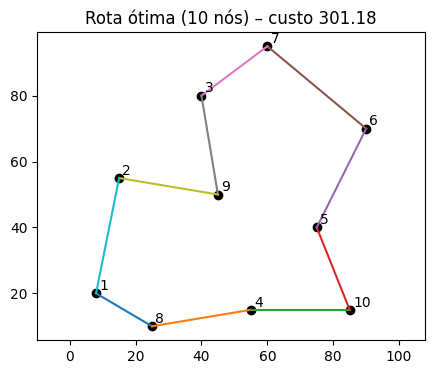

In [35]:
# Novas coordenadas (fictícias)  ───────────────
coords = np.array([
    [ 8, 20],   # 1
    [15, 55],   # 2
    [40, 80],   # 3
    [55, 15],   # 4
    [75, 40],   # 5
    [90, 70],   # 6
    [60, 95],   # 7
    [25, 10],   # 8
    [45, 50],   # 9
    [85, 15],   #10
])

# 1) imprime coordenadas e matriz de distâncias
cc.plot_points(coords, "Novas 10 cidades")     # opcional
print("\n┌── Coordenadas (x, y) ───────────")
for i,(x,y) in enumerate(coords,1):
    print(f"│ Cidade {i}: ({x}, {y})")
print("└────────────────────────────────\n")

dist = cc.euclidean_matrix(coords)

print("Tabela de distâncias euclidianas (unidades):")
display(cc.distance_table(coords))

# 2) resolve TSP
tour, cost = cc.solve_tsp_mtz(dist)
route_txt = " → ".join(str(i+1) for i in tour)
print(f"\nRota ótima: {route_txt}")
print(f"Distância total: {cost:.2f}")

# 3) plota rota ótima (opcional)
cc.plot_route(coords, tour, f"Rota ótima (10 nós) – custo {cost:.2f}")
